<a href="https://colab.research.google.com/github/agusekominarno/computer_vision/blob/main/neural_network/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://imgur.com/HE0kDhA.jpg"  align = "center">

# **Convolutional Neural Network**

Pada modul 1, kita sudah mencoba membuat model Neural network untuk mengklasifikasikan image. Akan tetapi, hasil klasifikasi yang didapatkan masih memiliki nilai akurasi yang rendah. Mengapa hal ini bisa terjadi? Jawabannya ada pada proses feature extraction.




*Feature extration* atau ekstrakasi fitur memiliki peran yang vital dalam pembuatan model machine learning. Dalam proses ini, ciri-ciri utama dari suatu data diekstrak. Hasil ekstraksi inilah yang diberikan ke sistem untuk dipelajari. Suatu model akan tercipta dari proses belajar ini (atau yang biasa dikenal dengan proses *training*). Sehingga, ketika ciri yang diekstrak dari suatu data tidak bisa menggambarkan ciri khas (pembeda) data tersebut dibandingkan dengan data yang lain, maka model yang tercipta juga tidak akan baik (akurasi rendah).

Dalam modul 1, fitur yang diekstrak dari dataset hanyalah nilai warna (RGB) dari tiap pixel yang ada pada image. Sayangnya, fitur warna ini tidak cukup untuk menjadi ciri khas dari suatu image. Dibutuhkan fitur-fitur lain (seperti edge, atau texture) agar model yang dihasilkan dapat memiliki nilai akurasi yang baik. 

Permasalahan fundamental dari metode-metode machine learning konvensional adalah ketergantungannya pada pemilihan fitur yang digunakan. Kita harus mendefinisikan fitur-fitur apa yang harus diekstrak secara mandiri, agar hasil klasifikasinya baik. Sayangnya, fitur ini sangat bergantung pada dataset yang digunakan. Sebagai contoh, perhatikan gambar berikut:

![alt text](https://imgur.com/lEtxP2O.png)

Untuk membedakan beruang kutub dan beruang coklat, kita tidak bisa menggunakan fitur edge atau shape, karena bentuk kedua hewan tersebut sama. Tetapi, kita bisa menggunakan fitur warna untuk membedakan keduanya. Akan tetapi, jika kita ingin membedakan beruang coklat dan kuda, kita tidak bisa menggunakan fitur warna saja, karena kedua hewan tersebut memiliki warna yang sama. Inilah yang dimaksud pada penjelasan di atas, bahwa proses ekstraksi fitur sangat mempengaruhi pembuatan model machine learning. Kemudian, apakah tidak ada metode yang dapat mengekstrak fitur secara otomatis tanpa harus repot-repot mendefinisikan fitur apa yang harus diekstrak?

Jawabannya ada pada metode Convolutional Neural Network (CNN). Metode ini merupakan metode deep learning. Metode ini pada dasarnya merupakan pengembangan dari metode neural network. Arsitektur jaringan yang ada pada metode ini memiliki 2 bagian utama, yakni bagian *Feature Learning (Feature Extraction Layer)* dan bagian *Classification (Fully Connected Layer)*. Untuk lebih jelasnya, perhatikan gambar berikut:

![alt text](https://i.imgur.com/SPoLfiE.png)

Terdapat beberapa layer yang ada dalam arsitektur CNN, diantaranya:


*   **Convolutional Layer**. Convolutional layer terdiri dari neuron yang tersusun sedemikian rupa sehingga membentuk sebuah filter dengan panjang dan tinggi (pixels). Sebagai contoh, layer pertama pada feature extraction layer biasanya adalah convolutional layer dengan ukuran 5x5x3. Panjang 5 pixels, tinggi 5 pixels dan tebal/jumlah 3 buah sesuai dengan channel dari image tersebut. Ketiga filter ini akan digeser keseluruh bagian dari gambar. Setiap pergeseran akan dilakukan operasi “dot” antara input dan nilai dari filter tersebut sehingga menghasilkan sebuah output atau biasa disebut sebagai activation map atau feature map

*   **Pooling Layer**. Pooling layer biasanya berada setelah convolutional layer. Pada prinsipnya pooling layer terdiri dari sebuah filter dengan ukuran dan stride tertentu yang akan bergeser pada seluruh area feature map. Pooling yang biasa digunakan adalah Max Pooling dan Average Pooling. Sebagai contoh jika kita menggunakan Max Pooling 2x2 dengan stride 2, maka pada setiap pergeseran filter, nilai maximum pada area 2x2 pixel tersebut yang akan dipilih, sedangkan Average Pooling akan memilih nilai rata-ratanya

*   **Fully Connected Layer**. Feature map yang dihasilkan dari feature extraction layer masih berbentuk multidimensional array, sehingga kita harus melakukan “flatten” atau reshape feature map menjadi sebuah vector agar bisa kita gunakan sebagai input dari fully-connected layer. FC Layer yang dimaksud disini adalah MLP yang sudah pernah kita pelajari sama-sama pada materi sebelumnya. FC Layer memiliki beberapa hidden layer, activation function, output layer dan loss function





---



---



# Langkah Praktikum

Pada praktikum kali ini, kita masih akan menggunakan dataset yang sama dengan modul 1, yakni "Cats and Dogs" dataset. Karena di modul 1 kemarin hasil klasifikasi kita masih memiliki akurasi yang rendah, kali ini kita akan mencoba menggunakan metode Deep Learning (yaitu CNN) untuk meningkatkan nilai akurasinya

<h3>Load Dataset</h3>

Pertama, kita download terlebih dahulu datasetnya

In [ ]:
# Download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-10-12 04:32:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.74.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  96.1MB/s    in 0.7s    

2020-10-12 04:32:46 (96.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Setelah itu, ekstrak datasetnya, dan simpan ke dalam local drive kita

In [ ]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Pisahkan antara data train dan data validation

In [ ]:
# Definisikan path untuk data train dan data validation

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

Sekarang, kita generate vektor dari data train dengan memanfaatkan library 'cv2'. Image juga kita resize menjadi 150 x 150 agar seragam. Terakhir kita set label untuk tiap image berdasarkan class nya (cat atau dog)

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

Langkah yang sama juga kita lakukan untuk data validation

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

Sekarang coba kita cek size dan dimensi dara dataset kita

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (2000, 150, 150, 3)
Train Label =  (2000,)
Validation Data =  (1000, 150, 150, 3)
Validation Label =  (1000,)


Terlihat bahwa kita memiliki 2000 data untuk training, dan 1000 data untuk validation. Dimensi tiap image 150 x 150. Dan image kita terdiri dari 3 channel (B, G, R). Sekarang, kita akan normalisasi dataset kita. Pertama, kita normalisasi nilai dari tiap pixel yang ada di dataset. Dari awalnya memiliki range 0 - 255, kita normalisasi menjadi range 0 - 1. Langkah ini dilakukan untuk memudahkan proses komputasi di tahapan berikutnya

In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [200 205 204]
Data setelah di-normalisasi  [0.78431374 0.8039216  0.8       ]


Selain data, label juga perlu dinormalisasi. Karena class yang kita gunakan hanya ada 2 (cat & dog), maka label akan kita set menjadi binary, yakni 0 dan 1

In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['cats' 'cats' 'cats' 'cats' 'cats' 'dogs' 'dogs' 'dogs' 'dogs' 'dogs']
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]


<h3>Definisikan Model</h3>

Berikutnya, kita akan mendefinisikan model (arsitektur) dari jaringan CNN kita. Pertama kita import dulu library yang diperlukan. Disini kita akan menggunakan 'keras'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

Kita akan membuat jaringan dengan arsitektur sebagai berikut:
INPUT -> CONVOLUTION -> POOLING -> CONVOLUTION -> POOLING -> CONVOLUTION -> POOLING - FULLY CONNECTED LAYER

In [ ]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

<h3>Training Model</h3>

Berikutnya, kita akan melatih model kita dengan epoch=15

In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
100/100 [==============================] - 47s 473ms/step - loss: 0.7216 - acc: 0.5335 - val_loss: 0.7017 - val_acc: 0.5000
Epoch 2/15
100/100 [==============================] - 47s 470ms/step - loss: 0.6625 - acc: 0.6105 - val_loss: 0.6708 - val_acc: 0.6120
Epoch 3/15
100/100 [==============================] - 47s 469ms/step - loss: 0.6047 - acc: 0.6805 - val_loss: 0.6178 - val_acc: 0.6820
Epoch 4/15
100/100 [==============================] - 47s 469ms/step - loss: 0.5323 - acc: 0.7370 - val_loss: 0.6043 - val_acc: 0.6910
Epoch 5/15
100/100 [==============================] - 47s 473ms/step - loss: 0.4671 - acc: 0.7755 - val_loss: 0.6154 - val_acc: 0.7060
Epoch 6/15
100/100 [==============================] - 47s 472ms/step - loss: 0.3708 - acc: 0.8410 - val_loss: 0.6804 - val_acc: 0.6920
Epoch 7/15
100/100 [==============================] - 48s 477ms/step - loss: 0.2714 - acc: 0.8880 - val_loss: 0.7655 - val_acc: 0.7050
Epoch 8/15
100/100 [==============================] - 4

<h3>Evaluasi Model</h3>

Kita akan menampilkan grafik loss dan akurasi

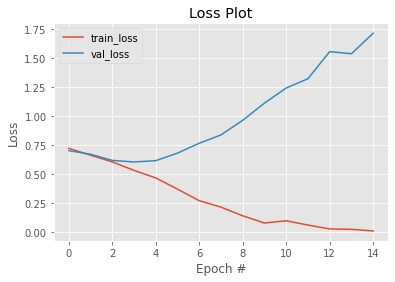

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

Disini terlihat bahwa nilai loss dari data validation cenderung naik setelah epoch ke-4. Ini berarti model yang kita buat masih overfit. Penjelasan tentang overfit akan dijelaskan pada modul berikutnya

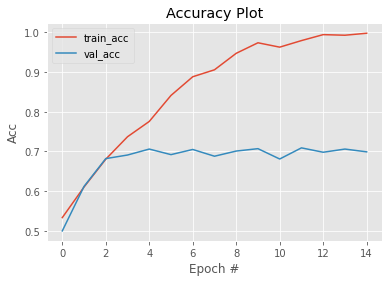

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       500
           1       0.70      0.71      0.70       500

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000

